In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [63]:
# df = pd.read_csv('Real estate.csv',index_col=2)

df = pd.read_csv('Real estate.csv')

In [64]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [65]:
y = df['Y house price of unit area'].to_numpy()
df_features = df.drop(['Y house price of unit area'],axis=1)
df_features = df_features.drop(['No'],axis=1, index=None)
# df_features = df.drop(['X1 transaction date'],axis=1)
# df_features = df_features.reset_index(drop=True, inplace=True)
df_features.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [66]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [67]:
dataset = df_features.to_numpy()
print(dataset.shape)
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)
X_train.shape

(414, 6)


(331, 6)

In [68]:
X_train

array([[2.0131670e+03, 4.3800000e+01, 5.7589450e+01, 7.0000000e+00,
        2.4967500e+01, 1.2154069e+02],
       [2.0132500e+03, 8.0000000e+00, 2.2166120e+03, 4.0000000e+00,
        2.4960070e+01, 1.2151361e+02],
       [2.0126670e+03, 7.1000000e+00, 2.1750300e+03, 3.0000000e+00,
        2.4963050e+01, 1.2151254e+02],
       ...,
       [2.0133330e+03, 1.0800000e+01, 2.5258220e+02, 1.0000000e+00,
        2.4974600e+01, 1.2153046e+02],
       [2.0128330e+03, 4.6000000e+00, 2.5966070e+02, 6.0000000e+00,
        2.4975850e+01, 1.2154516e+02],
       [2.0130830e+03, 1.1000000e+00, 1.9358450e+02, 6.0000000e+00,
        2.4965710e+01, 1.2154089e+02]])

In [69]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [70]:
X_train

array([[0.54585153, 1.        , 0.00544451, 0.7       , 0.42935046,
        0.71924048],
       [0.63646288, 0.1826484 , 0.34908633, 0.4       , 0.33931168,
        0.42201734],
       [0.        , 0.16210046, 0.34246791, 0.3       , 0.37542414,
        0.4102733 ],
       ...,
       [0.72707424, 0.24657534, 0.03648062, 0.1       , 0.51539021,
        0.60695862],
       [0.18122271, 0.10502283, 0.03760727, 0.6       , 0.53053805,
        0.76830205],
       [0.45414847, 0.02511416, 0.02709023, 0.6       , 0.40765875,
        0.72143563]])

In [71]:
reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)
print(reg.coef_, reg.intercept_)

[  4.98371954 -11.86066726 -29.89743459  10.91425268  18.9006328
  -2.68706995] 33.95867022612561


## Testing with scikitlearn

In [72]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted)))

r2 socre is 0.6810580555095846
mean_sqrd_error is== 53.50561912450375
root_mean_squared error of is== 7.314753524521777


In [73]:
yt = np.sort(y_test)
pt = np.sort(predicted)

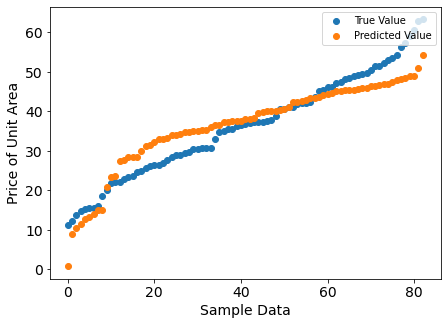

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
x = np.arange(len(y_test))
plt.scatter(x, yt,label="True Value")
plt.scatter(x, pt,label="Predicted Value")
plt.xlabel('Sample Data', size=14)
plt.ylabel('Price of Unit Area', size=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right')
# plt.savefig('realstate.pdf',bbox_inches='tight')
plt.show()

In [75]:
X_train_num = (X_train*100).astype(int)
X_test_num = (X_test*100).astype(int)
y_train_num = y_train
y_test_num = y_test

In [76]:
reg = LinearRegression().fit(X_train_num,y_train)
predicted_num = reg.predict(X_test_num)
print(reg.coef_,reg.intercept_)

[ 0.05051918 -0.11859647 -0.29927667  0.10942818  0.18855673 -0.02858129] 33.924460673188165


In [77]:
#importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,predicted_num)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predicted_num))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predicted_num)))

r2 socre is 0.6804934177085301
mean_sqrd_error is== 53.600342617755125
root_mean_squared error of is== 7.32122548606141


In [78]:
#shortening numners 
def shorter(c,d):
    c = int(c)
    d = int(d)
    if(c<0):
        n = c*(-1)
        if(len(str(n))==len(str(d)) and len(str(n))>3):      
            a = f"{n:.0f}"
            a = str(a[:-3])
            a = int(a)*(-1)
            b = f"{d:.0f}"
            b = str(b[:-3])
            b = int(b)
        elif(len(str(n))>=3 and len(str(d))>=3):
            a = f"{n:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-2
            else:
                s = len(str(b))-2
            a = int(a[:-s])
            b = int(b[:-s])
            a = a*-1 
        else:
            a = int(n*-1)
            b = d
    elif(len(str(c))==len(str(d)) and len(str(c))>3):      
            a = f"{c:.0f}"
            a = str(a[:-2])
            a = int(a)
            b = f"{d:.0f}"
            b = str(b[:-2])
            b = int(b)
#     elif(len(str(c))==1 and len(str(d))>3):
#         a = int(0)
#         b = int(1)
    elif(len(str(c))>3 and len(str(d))>3):
            a = f"{c:.0f}"
            a = str(a)
            b = f"{d:.0f}"
            b = str(b)
            if(len(str(a))<len(str(b))):
                s = len(str(a))-3
            else:
                s = len(str(b))-3
            a = int(a[:-s])
            b = int(b[:-s])
    else:
        a = c
        b = d
    return a,b

In [79]:
#condensed function multiply and add matrix with numerator and denominator one row at a time
# Python Program to find the L.C.M. of two input number
from math import gcd
def compute_lcm(x, y):
   # choose the greater number 
    if (x > y):
        greater = x
    else:
        greater = y
    while(True):
        if(x==0):
            lcm = y
            break
        elif(y==0):
            lcm = x
            break
        elif((greater % x == 0) and (greater % y == 0)):
            lcm = greater
            break
        greater += 1
    return lcm
 
#Subtracting 2 numbers of the form a/b -c/d
def subtraction(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) - ((den/d)*c)
    return num,den

#adding array of elements of the form x/y
def add_array(a_num,a_den):
    #will work for an int array of any length
    lcm = np.amax(a_den);sum1 =0
#     for i in a_den:
#         lcm = int(lcm*i/gcd(lcm, i))
#     print("lcm is ",lcm)
    for i in range(len(a_num)):
        sum1 = sum1 + (a_num[i]*(a_den[i]/lcm))
#         print(a_num[i],a_den[i],lcm)      
#     print("sum is ", sum1)
    return sum1,lcm

#adding two numbers of the form a/b + c/d
def addition(a,b,c,d):
    den = compute_lcm(b,d)
    if b ==0:
        num = c ; den = d
    elif d==0:
        num= a ; den = b
    else:    
        num = ((den/b)*a) + ((den/d)*c)
    return int(num),int(den)

#multiplying two arrays of fraction and adding them  for row by column multiplication
def multiply(a_num,a_den,b_num, b_den):
#     print(type(a_num))
    z_num = np.zeros(len(a_num)).astype(int)
    z_den = np.zeros(len(a_den)).astype(int)
#     print("printing anum,aden,bnum,bden",a_num,a_den,b_num,b_den)                                   
    for i in range(len(a_num)):
        z_num[i]=(a_num[i]*b_num[i])     
        z_den[i]=(a_den[i]*b_den[i])
    
    x = z_num.tolist()
    y = z_den.tolist()
#     print("Printing z_num and z_den", x , y )
    num,den = add_array(x,y)
#     print("multiplication results is",num,den) 
    return num,den
    

In [80]:
#claculate y_hat =wx+b | x is in the form a single array and w is in the form of array too
# need toc hange w into wnum and wden
def y_hat(w_num,w_den,x_num,x_den,b):
    y_hat_num = np.zeros(x_num.shape[0]).astype(int)
    y_hat_den = np.zeros(x_den.shape[0]).astype(int)
    #multiplying w and x
    for i in range(x_num.shape[0]):
#         print("iteration number ",i)
        x_n = x_num[i] 
        x_d = x_den[i] 
#         print(x_n,x_d,w_num,w_den)
        temp_n, temp_d = multiply(x_n,x_d,w_num,w_den)
#         print("printing temporary values",temp_n,temp_d)
        y_hat_num[i],y_hat_den[i] = addition( temp_n, temp_d,b[0],b[1])
        y_hat_num[i],y_hat_den[i] = shorter(y_hat_num[i],y_hat_den[i])   #trying this
#     print("y_hat values for this iterationsa are",y_hat_num,y_hat_den)
    return y_hat_num,y_hat_den

#calculating mean square values
def mse(y_hat_num,y_hat_den,y_num,y_den,n):
    num=0;den =0
    for i in range(len(y_hat_num)):
        num1,den1=subtraction(y_num[i],y_den[i],y_hat_num[i],y_hat_den[i])
        num1 = num1*num1
        den1 = den1*den1
        num,den = addition(num,den,num1,den1)
    den = den * n
#     print(num,den)
    return num,den


#calculating subtraction of Y_hat Y
def y_hat_substraction(y_hat_num,y_hat_den,y_num,y_den):
    y_diff =np.zeros((y_hat_num.shape[0],2))
    for i in range(len(y_hat_num)):
        y_diff[i][0],y_diff[i][1] = subtraction(y_hat_num[i],y_hat_den[i], y_num[i], y_den[i])
    return y_diff

#getting delta w with respect 
#need change - can call the subtraction of y_hat from y
def delta_w(y_hat_diff,x_num, x_den, n):
    del_w_num = np.zeros(x_num.shape[1])
    del_w_den = np.zeros(x_num.shape[1])
    
    x_num = x_num.T
    x_den = x_den.T
    y_num = y_hat_diff[:,0]
    y_den = y_hat_diff[:,1]
    
#     print("getting delta w num and den ")
    for i in range(len(del_w_num)):
#         print("printing X",len(x_num[i]))
#         print("printing X",len(x_den[i]))
#         print("printing y diff",len( y_num))
#         print("printing y diff", len(y_den))
        del_w_num[i],del_w_den[i] = multiply(x_num[i],x_den[i],y_num,y_den)
        del_w_num[i] = del_w_num[i]*2
        del_w_den[i] = del_w_den[i]*n
#     print("delta w num and den are",del_w_num,del_w_den)
    return del_w_num,del_w_den


#getting delta b 
def delta_b(y_hat_diff):

#     print(type(y_hat_diff))
    yh_num = np.array(y_hat_diff[:,0]).astype(int)
    yh_den = np.array(y_hat_diff[:,1]).astype(int)
#     print(type(yh_num[0]))
#     print(type(yh_den[0]))    
#     print("printing yh_num",yh_num)
#     print("printing yh_den",yh_den)
    num,den = add_array(yh_num, yh_den)
    num = num*2
    den = den*len(yh_num)
#     print("printing delta_b", num,den)
    return num,den


# get new weights and biases
def get_new_params(lr, dw_num,dw_den,db_num,db_den,w_num,w_den,b_num,b_den):
    
    for i in range(len(dw_num)):
        dw_num[i]= dw_num[i]*lr[0]
        dw_den[i]= dw_den[i]*lr[1]
   
    btemp_num = lr[0] * db_num
    btemp_den = lr[1] * db_den 

    for i in range(len(dw_num)):
        dw_num[i],dw_den[i] = subtraction(w_num[i],w_den[i],dw_num[i],dw_den[i]) 
    
    db_num,db_den = subtraction(b_num,b_den,btemp_num,btemp_den)
#     print("printing new weight parameters", dw_num,dw_den)
#     print("printing new bias parameters",db_num,db_den)
    return  dw_num,dw_den,db_num,db_den

#normalize weights and bias
def normalize_weights_bias(wnum,wden, bnum,bden):
    wn_num = np.zeros(6) 
    wn_den = np.zeros(6)
    for i in range (len(wf_num)):
        wn_num[i] = int((wnum[i]/wden[i]) * 100)
        wn_den[i] = 100
    bnum = int(bnum/bden * 100)
    bden = 100
    
#     print("Normalizing weights and biases",wn_num,wn_den, bnum, bden)
    return wn_num, wn_den,bnum, bden


In [81]:
# X_train_num = X_train_num.astype(int)
# X_test_num = X_test_num.astype(int)
# y_train_num = y_train
# y_test_num = y_test

# y_train_num

In [82]:
X_train_den = np.full(X_train.shape, 100) 
X_test_den = np.full(X_test.shape, 100) 
y_train_den = np.ones(len(y_train))
y_test_den = np.ones(len(y_test))
# y_train_den

In [83]:
wnum = np.ones(6)
wden = np.ones(6)
b =[1,1]
bnum =1
bden =1
lr = [1,10]
loss_num =[]
loss_den=[]
for i in range(1000):
    yh_num,yh_den = y_hat(wnum,wden,X_train_num, X_train_den,b)
#     print("yhnum and uhden are ", yh_num,yh_den)
#     print("printing y_hat results",yh_num, yh_den)

#     print("printing",y_train_num,y_train_den)
    #getting MSE, MSE matches with my main code
    mse_num,mse_den= mse(yh_num, yh_den, y_train_num,y_train_den,len(yh_num))
    loss_num.append(mse_num)
    loss_den.append(mse_den)
#     print("loss is ",mse_num, mse_den)
#     print("printing mse", mse_num, mse_den)
    #getting y_hat differenc
    y_diff = y_hat_substraction(yh_num,yh_den,y_train_num,y_train_den)
#     print("printing y_diff",y_diff)

    # get delta_W
    delw_num,delw_den = delta_w(y_diff,X_train_num,X_train_den, len(yh_num))
#     print("printing delw", delw_num, delw_den)
    # get delta_b
    delb_num, delb_den = delta_b(y_diff)
#     print("printing delta_bias", delb_num, delb_den)
    #get new parameters
    wf_num,wf_den,bf_num,bf_den = get_new_params(lr, delw_num,delw_den,delb_num,delb_den,wnum,wden,bnum,bden)
    
    #normalize weights and bias parameters
    wnum,wden, bnum, bden = normalize_weights_bias(wf_num,wf_den,bf_num,bf_den)
    print("printing initial params", wnum,wden, bnum, bden)
    b[0] = bnum
    b[1] = bden
    print(i)
print("Final params",wnum,wden, bnum, bden)

printing initial params [480. 354. 176. 431. 432. 566.] [100. 100. 100. 100. 100. 100.] 795 100
0
printing initial params [681. 480. 206. 621. 618. 824.] [100. 100. 100. 100. 100. 100.] 1172 100
1
printing initial params [785. 537. 211. 734. 724. 969.] [100. 100. 100. 100. 100. 100.] 1375 100
2
printing initial params [ 836.  557.  203.  806.  787. 1053.] [100. 100. 100. 100. 100. 100.] 1484 100
3
printing initial params [ 859.  556.  188.  855.  827. 1103.] [100. 100. 100. 100. 100. 100.] 1542 100
4
printing initial params [ 866.  545.  170.  891.  854. 1135.] [100. 100. 100. 100. 100. 100.] 1573 100
5
printing initial params [ 865.  528.  150.  920.  874. 1157.] [100. 100. 100. 100. 100. 100.] 1589 100
6
printing initial params [ 860.  508.  129.  944.  890. 1173.] [100. 100. 100. 100. 100. 100.] 1597 100
7
printing initial params [ 853.  487.  108.  966.  904. 1186.] [100. 100. 100. 100. 100. 100.] 1600 100
8
printing initial params [ 845.  465.   87.  986.  916. 1198.] [100. 100. 1

printing initial params [ 529. -565. -754. 1558. 1437. 1530.] [100. 100. 100. 100. 100. 100.] 1618 100
86
printing initial params [ 528. -572. -759. 1559. 1441. 1531.] [100. 100. 100. 100. 100. 100.] 1619 100
87
printing initial params [ 527. -579. -764. 1560. 1445. 1532.] [100. 100. 100. 100. 100. 100.] 1620 100
88
printing initial params [ 526. -586. -769. 1561. 1449. 1533.] [100. 100. 100. 100. 100. 100.] 1621 100
89
printing initial params [ 525. -593. -774. 1562. 1453. 1534.] [100. 100. 100. 100. 100. 100.] 1622 100
90
printing initial params [ 524. -600. -779. 1563. 1457. 1535.] [100. 100. 100. 100. 100. 100.] 1623 100
91
printing initial params [ 523. -606. -784. 1564. 1461. 1536.] [100. 100. 100. 100. 100. 100.] 1625 100
92
printing initial params [ 522. -613. -789. 1565. 1465. 1537.] [100. 100. 100. 100. 100. 100.] 1626 100
93
printing initial params [ 521. -619. -794. 1566. 1469. 1538.] [100. 100. 100. 100. 100. 100.] 1627 100
94
printing initial params [ 520. -625. -799. 156

printing initial params [  506.  -911. -1038.  1527.  1698.  1537.] [100. 100. 100. 100. 100. 100.] 1702 100
166
printing initial params [  506.  -913. -1040.  1526.  1700.  1536.] [100. 100. 100. 100. 100. 100.] 1703 100
167
printing initial params [  506.  -915. -1042.  1525.  1702.  1535.] [100. 100. 100. 100. 100. 100.] 1704 100
168
printing initial params [  506.  -917. -1044.  1524.  1704.  1534.] [100. 100. 100. 100. 100. 100.] 1705 100
169
printing initial params [  506.  -919. -1046.  1523.  1706.  1533.] [100. 100. 100. 100. 100. 100.] 1707 100
170
printing initial params [  506.  -921. -1048.  1522.  1708.  1532.] [100. 100. 100. 100. 100. 100.] 1708 100
171
printing initial params [  506.  -923. -1050.  1521.  1710.  1531.] [100. 100. 100. 100. 100. 100.] 1709 100
172
printing initial params [  506.  -925. -1052.  1520.  1712.  1530.] [100. 100. 100. 100. 100. 100.] 1710 100
173
printing initial params [  506.  -927. -1054.  1519.  1714.  1529.] [100. 100. 100. 100. 100. 10

printing initial params [  503. -1020. -1192.  1450.  1849.  1460.] [100. 100. 100. 100. 100. 100.] 1787 100
243
printing initial params [  503. -1021. -1194.  1449.  1850.  1459.] [100. 100. 100. 100. 100. 100.] 1788 100
244
printing initial params [  503. -1022. -1196.  1448.  1852.  1458.] [100. 100. 100. 100. 100. 100.] 1789 100
245
printing initial params [  503. -1023. -1198.  1447.  1853.  1457.] [100. 100. 100. 100. 100. 100.] 1790 100
246
printing initial params [  503. -1024. -1200.  1446.  1855.  1456.] [100. 100. 100. 100. 100. 100.] 1791 100
247
printing initial params [  503. -1025. -1202.  1445.  1856.  1455.] [100. 100. 100. 100. 100. 100.] 1792 100
248
printing initial params [  503. -1026. -1204.  1444.  1858.  1454.] [100. 100. 100. 100. 100. 100.] 1793 100
249
printing initial params [  503. -1027. -1206.  1443.  1859.  1453.] [100. 100. 100. 100. 100. 100.] 1794 100
250
printing initial params [  503. -1028. -1208.  1442.  1861.  1452.] [100. 100. 100. 100. 100. 10

printing initial params [  503. -1067. -1300.  1378.  1937.  1386.] [100. 100. 100. 100. 100. 100.] 1861 100
317
printing initial params [  503. -1068. -1301.  1377.  1938.  1385.] [100. 100. 100. 100. 100. 100.] 1862 100
318
printing initial params [  503. -1068. -1302.  1376.  1939.  1384.] [100. 100. 100. 100. 100. 100.] 1863 100
319
printing initial params [  503. -1068. -1303.  1375.  1940.  1383.] [100. 100. 100. 100. 100. 100.] 1864 100
320
printing initial params [  503. -1069. -1305.  1374.  1941.  1382.] [100. 100. 100. 100. 100. 100.] 1865 100
321
printing initial params [  503. -1069. -1306.  1374.  1942.  1381.] [100. 100. 100. 100. 100. 100.] 1866 100
322
printing initial params [  503. -1070. -1308.  1373.  1943.  1379.] [100. 100. 100. 100. 100. 100.] 1867 100
323
printing initial params [  503. -1070. -1309.  1373.  1944.  1378.] [100. 100. 100. 100. 100. 100.] 1868 100
324
printing initial params [  503. -1070. -1310.  1372.  1945.  1377.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1079. -1379.  1346.  2013.  1289.] [100. 100. 100. 100. 100. 100.] 1924 100
393
printing initial params [  497. -1079. -1380.  1346.  2014.  1288.] [100. 100. 100. 100. 100. 100.] 1925 100
394
printing initial params [  497. -1080. -1381.  1345.  2015.  1286.] [100. 100. 100. 100. 100. 100.] 1925 100
395
printing initial params [  497. -1080. -1382.  1345.  2016.  1285.] [100. 100. 100. 100. 100. 100.] 1926 100
396
printing initial params [  497. -1080. -1383.  1345.  2017.  1284.] [100. 100. 100. 100. 100. 100.] 1927 100
397
printing initial params [  497. -1080. -1384.  1344.  2018.  1283.] [100. 100. 100. 100. 100. 100.] 1927 100
398
printing initial params [  497. -1080. -1385.  1344.  2019.  1282.] [100. 100. 100. 100. 100. 100.] 1928 100
399
printing initial params [  497. -1080. -1386.  1344.  2020.  1281.] [100. 100. 100. 100. 100. 100.] 1929 100
400
printing initial params [  497. -1080. -1387.  1343.  2021.  1279.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1454.  1324.  2070.  1205.] [100. 100. 100. 100. 100. 100.] 1974 100
468
printing initial params [  497. -1081. -1455.  1324.  2070.  1204.] [100. 100. 100. 100. 100. 100.] 1975 100
469
printing initial params [  497. -1081. -1456.  1323.  2070.  1203.] [100. 100. 100. 100. 100. 100.] 1975 100
470
printing initial params [  497. -1081. -1457.  1323.  2071.  1202.] [100. 100. 100. 100. 100. 100.] 1976 100
471
printing initial params [  497. -1081. -1458.  1323.  2071.  1201.] [100. 100. 100. 100. 100. 100.] 1977 100
472
printing initial params [  497. -1081. -1459.  1323.  2071.  1200.] [100. 100. 100. 100. 100. 100.] 1978 100
473
printing initial params [  497. -1081. -1460.  1323.  2071.  1199.] [100. 100. 100. 100. 100. 100.] 1979 100
474
printing initial params [  497. -1081. -1461.  1322.  2071.  1198.] [100. 100. 100. 100. 100. 100.] 1979 100
475
printing initial params [  497. -1081. -1462.  1322.  2072.  1197.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1529.  1311.  2075.  1130.] [100. 100. 100. 100. 100. 100.] 2037 100
543
printing initial params [  497. -1081. -1530.  1311.  2075.  1129.] [100. 100. 100. 100. 100. 100.] 2038 100
544
printing initial params [  497. -1081. -1531.  1311.  2075.  1128.] [100. 100. 100. 100. 100. 100.] 2039 100
545
printing initial params [  497. -1081. -1532.  1310.  2075.  1127.] [100. 100. 100. 100. 100. 100.] 2039 100
546
printing initial params [  497. -1081. -1533.  1310.  2075.  1126.] [100. 100. 100. 100. 100. 100.] 2040 100
547
printing initial params [  497. -1081. -1534.  1310.  2075.  1125.] [100. 100. 100. 100. 100. 100.] 2041 100
548
printing initial params [  497. -1081. -1535.  1310.  2075.  1124.] [100. 100. 100. 100. 100. 100.] 2042 100
549
printing initial params [  497. -1081. -1536.  1310.  2075.  1123.] [100. 100. 100. 100. 100. 100.] 2043 100
550
printing initial params [  497. -1081. -1537.  1310.  2075.  1122.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1609.  1298.  2075.  1050.] [100. 100. 100. 100. 100. 100.] 2106 100
623
printing initial params [  497. -1081. -1610.  1298.  2075.  1049.] [100. 100. 100. 100. 100. 100.] 2107 100
624
printing initial params [  497. -1081. -1611.  1298.  2075.  1048.] [100. 100. 100. 100. 100. 100.] 2108 100
625
printing initial params [  497. -1081. -1612.  1298.  2075.  1047.] [100. 100. 100. 100. 100. 100.] 2109 100
626
printing initial params [  497. -1081. -1613.  1298.  2075.  1046.] [100. 100. 100. 100. 100. 100.] 2110 100
627
printing initial params [  497. -1081. -1614.  1297.  2075.  1045.] [100. 100. 100. 100. 100. 100.] 2110 100
628
printing initial params [  497. -1081. -1615.  1297.  2075.  1044.] [100. 100. 100. 100. 100. 100.] 2111 100
629
printing initial params [  497. -1081. -1616.  1297.  2075.  1043.] [100. 100. 100. 100. 100. 100.] 2112 100
630
printing initial params [  497. -1081. -1617.  1297.  2075.  1042.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1688.  1286.  2075.   971.] [100. 100. 100. 100. 100. 100.] 2174 100
702
printing initial params [  497. -1081. -1689.  1286.  2075.   970.] [100. 100. 100. 100. 100. 100.] 2175 100
703
printing initial params [  497. -1081. -1690.  1286.  2075.   969.] [100. 100. 100. 100. 100. 100.] 2176 100
704
printing initial params [  497. -1081. -1691.  1286.  2075.   968.] [100. 100. 100. 100. 100. 100.] 2177 100
705
printing initial params [  497. -1081. -1692.  1286.  2075.   967.] [100. 100. 100. 100. 100. 100.] 2178 100
706
printing initial params [  497. -1081. -1693.  1285.  2075.   966.] [100. 100. 100. 100. 100. 100.] 2178 100
707
printing initial params [  497. -1081. -1694.  1285.  2075.   965.] [100. 100. 100. 100. 100. 100.] 2179 100
708
printing initial params [  497. -1081. -1695.  1285.  2075.   964.] [100. 100. 100. 100. 100. 100.] 2180 100
709
printing initial params [  497. -1081. -1696.  1285.  2075.   963.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1764.  1274.  2075.   895.] [100. 100. 100. 100. 100. 100.] 2240 100
778
printing initial params [  497. -1081. -1765.  1274.  2075.   894.] [100. 100. 100. 100. 100. 100.] 2241 100
779
printing initial params [  497. -1081. -1766.  1274.  2075.   893.] [100. 100. 100. 100. 100. 100.] 2242 100
780
printing initial params [  497. -1081. -1767.  1274.  2075.   892.] [100. 100. 100. 100. 100. 100.] 2243 100
781
printing initial params [  497. -1081. -1768.  1273.  2075.   891.] [100. 100. 100. 100. 100. 100.] 2243 100
782
printing initial params [  497. -1081. -1769.  1273.  2075.   890.] [100. 100. 100. 100. 100. 100.] 2244 100
783
printing initial params [  497. -1081. -1770.  1273.  2075.   889.] [100. 100. 100. 100. 100. 100.] 2245 100
784
printing initial params [  497. -1081. -1771.  1273.  2075.   888.] [100. 100. 100. 100. 100. 100.] 2246 100
785
printing initial params [  497. -1081. -1772.  1273.  2075.   887.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1838.  1263.  2075.   821.] [100. 100. 100. 100. 100. 100.] 2304 100
852
printing initial params [  497. -1081. -1839.  1263.  2075.   820.] [100. 100. 100. 100. 100. 100.] 2305 100
853
printing initial params [  497. -1081. -1840.  1262.  2075.   819.] [100. 100. 100. 100. 100. 100.] 2306 100
854
printing initial params [  497. -1081. -1841.  1262.  2075.   818.] [100. 100. 100. 100. 100. 100.] 2307 100
855
printing initial params [  497. -1081. -1842.  1262.  2075.   817.] [100. 100. 100. 100. 100. 100.] 2308 100
856
printing initial params [  497. -1081. -1843.  1261.  2075.   816.] [100. 100. 100. 100. 100. 100.] 2308 100
857
printing initial params [  497. -1081. -1844.  1261.  2075.   815.] [100. 100. 100. 100. 100. 100.] 2309 100
858
printing initial params [  497. -1081. -1845.  1261.  2075.   814.] [100. 100. 100. 100. 100. 100.] 2310 100
859
printing initial params [  497. -1081. -1846.  1261.  2075.   813.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1081. -1911.  1252.  2075.   748.] [100. 100. 100. 100. 100. 100.] 2367 100
925
printing initial params [  497. -1081. -1912.  1252.  2075.   747.] [100. 100. 100. 100. 100. 100.] 2368 100
926
printing initial params [  497. -1081. -1913.  1251.  2075.   746.] [100. 100. 100. 100. 100. 100.] 2368 100
927
printing initial params [  497. -1081. -1914.  1251.  2075.   745.] [100. 100. 100. 100. 100. 100.] 2369 100
928
printing initial params [  497. -1081. -1915.  1251.  2075.   744.] [100. 100. 100. 100. 100. 100.] 2370 100
929
printing initial params [  497. -1081. -1916.  1251.  2075.   743.] [100. 100. 100. 100. 100. 100.] 2371 100
930
printing initial params [  497. -1081. -1917.  1251.  2075.   742.] [100. 100. 100. 100. 100. 100.] 2372 100
931
printing initial params [  497. -1081. -1918.  1251.  2075.   741.] [100. 100. 100. 100. 100. 100.] 2373 100
932
printing initial params [  497. -1081. -1919.  1251.  2075.   740.] [100. 100. 100. 100. 100. 10

printing initial params [  497. -1082. -1972.  1244.  2075.   675.] [100. 100. 100. 100. 100. 100.] 2427 100
998
printing initial params [  497. -1082. -1973.  1244.  2075.   674.] [100. 100. 100. 100. 100. 100.] 2428 100
999
Final params [  497. -1082. -1973.  1244.  2075.   674.] [100. 100. 100. 100. 100. 100.] 2428 100


In [84]:
w = np.array(wnum/wden).astype(int)
b = int(bnum/bden)
print("parameters are ", w,b)

pred =[]
for i in range(X_test.shape[0]):
    sum =0
    for j in range (len(wnum)):
        sum = sum + X_test[i][j] * w[j]
    pred.append((sum+b))
print(pred)

parameters are  [  4 -10 -19  12  20   6] 24
[45.09933902919644, 39.13684108352035, 40.26523810001514, 36.64139934778572, 26.45082922021047, 43.79505731183761, 43.26507591648976, 44.65073123742037, 22.225876304745075, 51.80682923803231, 31.780667949508686, 33.87638895145154, 35.77440551227126, 21.933684794861623, 34.590554423244946, 31.77102609128263, 42.26926620436214, 42.47705824948958, 28.82468861899916, 42.80694543082432, 3.399302640671319, 32.621853522569026, 46.09778717239395, 43.259726232300366, 12.188865451109201, 36.26133444383821, 13.136828890241496, 39.173535043248066, 33.900969497515476, 37.022361314925305, 13.414576597807324, 37.11392373872614, 34.786668977596484, 27.977452792731327, 44.7569330747821, 29.43761769627379, 49.05834964639938, 14.236762726712545, 47.796113535818556, 39.54517962327071, 37.44431636622083, 38.93521999704539, 46.22442961579712, 36.02323019481495, 38.090800127208084, 45.55677271485617, 43.00780227891313, 24.551439950103052, 45.035038707234136, 44.92

In [85]:
y_pred = np.array(pred)


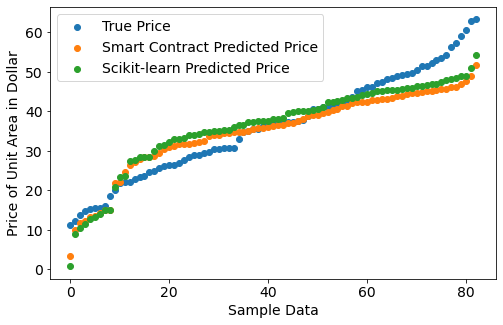

In [92]:
pr = np.sort(y_pred)
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
x = np.arange(len(y_test))
plt.scatter(x, yt,label="True Price ")
plt.scatter(x, pr,label="Smart Contract Predicted Price")
plt.scatter(x, pt, label ="Scikit-learn Predicted Price")
plt.xlabel('Sample Data', size=14)
plt.ylabel('Price of Unit Area in Dollar', size=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.savefig('realstate.pdf',bbox_inches='tight')
plt.show()

In [87]:
score=r2_score(y_test,y_pred)
print('r2 socre is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is 0.6718206740463726
mean_sqrd_error is== 55.055279878808285
root_mean_squared error of is== 7.419924519751416
